In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Load in the data

In [2]:
filename = "../../../../cscratch1/sd/jupiter/sim2_z3_FGPA_cgs.h5"

h5 = h5py.File(filename,'r')

## Download data

In [7]:
i1 = (int) (np.round(np.random.rand() * 1024))
i2 = (int) (np.round(np.random.rand() * 1024))
print(i1)
print(i2)

# shape = [2,2,1024]
# inds = (slice(0,shape[0]), slice(0,shape[1]), slice(0, shape[2]))

# take a random skewer
# i1 = 957
# i2 = 879
inds = (slice(i1, i1+1), slice(i2, i2+1), slice(0,1024))

133
515


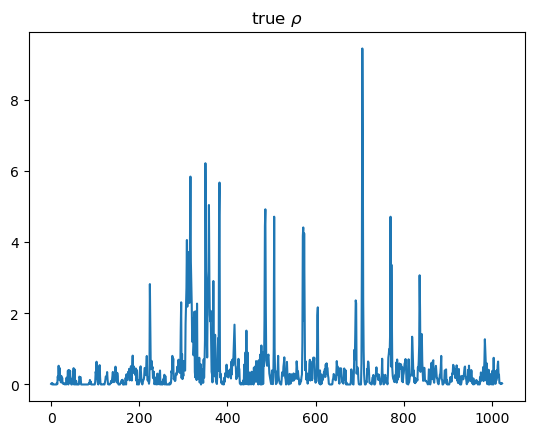

In [8]:
# check if this skewer doesn't have large spikes
DM_dens = h5['native_fields']['matter_density'][()][inds] # rho

plt.plot(np.squeeze(DM_dens))
plt.title(r"true $\rho$")
plt.show()

In [9]:
# numpy arrays
baryon_dens = h5['native_fields']['baryon_density'][()][inds] # rho_b
temperature = h5['native_fields']['temperature'][()][inds] # T
vel_b = h5['native_fields']['velocity_z'][()][inds] # v_b

tau_real = h5['derived_fields']['tau_real'][()][inds] # real-space optical depth
tau_red = h5['derived_fields']['tau_red'][()][inds] # redshift-space optical depth

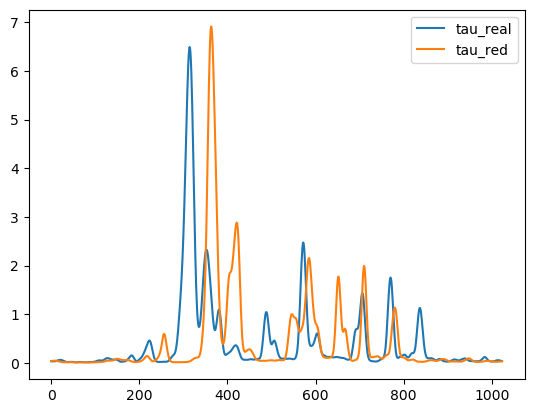

In [10]:
plt.plot(np.squeeze(tau_real), label=r"tau_real")
plt.plot(np.squeeze(tau_red), label=r"tau_red")
plt.legend()
plt.show()

In [11]:
# save as npy files
np.save("demo_skew/matter_density.npy", DM_dens)
np.save("demo_skew/baryon_density.npy", baryon_dens)
np.save("demo_skew/temperature.npy", temperature)
np.save("demo_skew/vel_b.npy", vel_b)

np.save("demo_skew/tau_real.npy", tau_real)
np.save("demo_skew/tau_red.npy", tau_red)

# save as h5 files
# write_field(DM_dens, "matter_density", "native_fields_2x2x1024.h5")
# write_field(baryon_dens, "baryon_density", "native_fields_2x2x1024.h5")
# write_field(temperature, "temperature", "native_fields_2x2x1024.h5")

# close files
h5.close()

## Plot cross-sections

In [3]:
# take a cross-section parallel to the yz-plane
ind = 42

rhob = h5['native_fields']['baryon_density'][ind,...]
temp = h5['native_fields']['temperature'][ind,...]
vel = h5['native_fields']['velocity_z'][ind,...]

treal = h5['derived_fields']['tau_real'][ind,...]
tred = h5['derived_fields']['tau_red'][ind,...]
n_hi = h5['derived_fields']['HI_number_density'][ind,...]

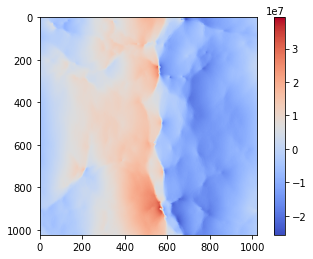

In [6]:
# try plotting one slice
plt.imshow(vel, cmap='coolwarm')
plt.colorbar()

plt.show()

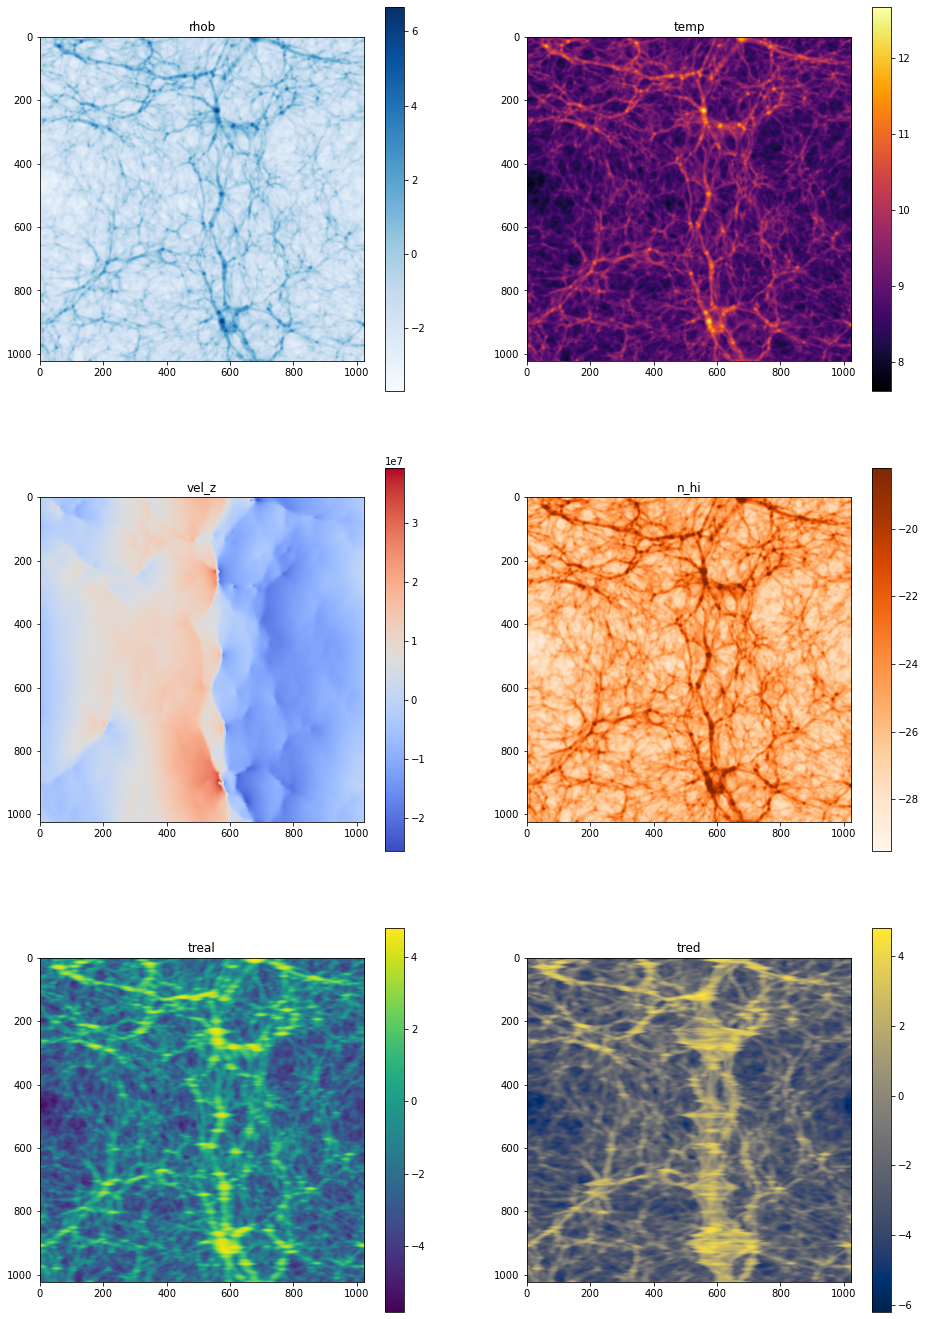

In [7]:
# plot the six slices
fig, axes = plt.subplots(3, 2, figsize=(16,24))

im1 = axes[0,0].imshow(np.log(rhob), cmap='Blues')
axes[0,0].set_title("rhob")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(temp), cmap='inferno')
axes[0,1].set_title("temp")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(vel, cmap='coolwarm')
axes[1,0].set_title("vel_z")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(n_hi), cmap='Oranges')
axes[1,1].set_title("n_hi")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(treal), cmap='viridis')
axes[2,0].set_title("treal")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred), cmap='cividis')
axes[2,1].set_title("tred")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

In [26]:
h5.close()

## Exploring the file's properties

In [25]:
# print relevant attributes (i.e. the metadata)
print("Format:", h5.attrs['format'])
print()

for key in h5['domain'].attrs.keys():
    print(key + ": " + str(h5['domain'].attrs[key]))
print()

for key in h5['universe'].attrs.keys():
    print(key + ": " + str(h5['universe'].attrs[key]))

Format: b'nyx-lyaf'

shape: [1024 1024 1024]
size: [21.09375 21.09375 21.09375]

hubble: 0.675
omega_b: 0.0487
omega_l: 0.69
omega_m: 0.31
redshift: 2.9999991588912964


In [8]:
# print the attribute keys of every group/dataset 
print(h5)
print(h5.attrs.keys())

def print_attrs(name, object):
    print(object)
    print(object.attrs.keys())
    
h5.visititems(print_attrs)

<HDF5 file "sim2_z3_FGPA_cgs.h5" (mode r)>
<KeysViewHDF5 ['format']>
<HDF5 group "/aux_fields" (3 members)>
<KeysViewHDF5 []>
<HDF5 dataset "DM_vx": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 []>
<HDF5 dataset "DM_vy": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 []>
<HDF5 dataset "DM_vz": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 []>
<HDF5 group "/derived_fields" (5 members)>
<KeysViewHDF5 []>
<HDF5 dataset "HI_number_density": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "flux_real": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "flux_red": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "tau_real": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 dataset "tau_red": shape (1024, 1024, 1024), type "<f4">
<KeysViewHDF5 ['units']>
<HDF5 group "/domain" (0 members)>
<KeysViewHDF5 ['shape', 'size']>
<HDF5 group "/native_fields" (9 members)>
<KeysViewHDF

In [31]:
# print the dataset names
for key in h5.keys():
    temp = h5[key]
    print(f'Datasets in {temp.name}: {list(temp.keys())}\n')

Datasets in /aux_fields: ['DM_vx', 'DM_vy', 'DM_vz']

Datasets in /derived_fields: ['HI_number_density', 'flux_real', 'flux_red', 'tau_real', 'tau_red']

Datasets in /domain: []

Datasets in /native_fields: ['baryon_density', 'matter_density', 'particle_vx', 'particle_vy', 'particle_vz', 'temperature', 'velocity_x', 'velocity_y', 'velocity_z']

Datasets in /universe: []



In [11]:
# print the units of every field
for field in h5['derived_fields']:
    print('Units of ' + field + ':', h5['derived_fields'][field].attrs['units'])
    
print()

for field in h5['native_fields']:
    print('Units of ' + field + ':', h5['native_fields'][field].attrs['units'])

Units of HI_number_density: b'cm**-3'
Units of flux_real: b'none'
Units of flux_red: b'none'
Units of tau_real: b'none'
Units of tau_red: b'none'

Units of baryon_density: b'(mean)'
Units of matter_density: b'(mean)'
Units of particle_vx: b'km/s'
Units of particle_vy: b'km/s'
Units of particle_vz: b'km/s'
Units of temperature: b'K'
Units of velocity_x: b'km/s'
Units of velocity_y: b'km/s'
Units of velocity_z: b'km/s'


In [38]:
# all datasets are 1024^3
h5['native_fields']['velocity_x'].shape

(1024, 1024, 1024)

In [12]:
h5.close()